<a href="https://colab.research.google.com/github/naidu1997/python-project1/blob/main/linear_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data= pd.read_csv('/content/archive (11).zip')

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#data preprocessing
data['Age']= 2024-data['Year']

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [ ]:
data.rename(columns={'Selling_Price':'selling_price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'past_owners'},inplace= True)

In [ ]:
data.head()

,Car_Name,Year,selling_price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,past_owners
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.columns

Index(['Car_Name', 'Year', 'selling_price(lacs)', 'Present_Price(lacs)',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission',
       'past_owners'],
      dtype='object')

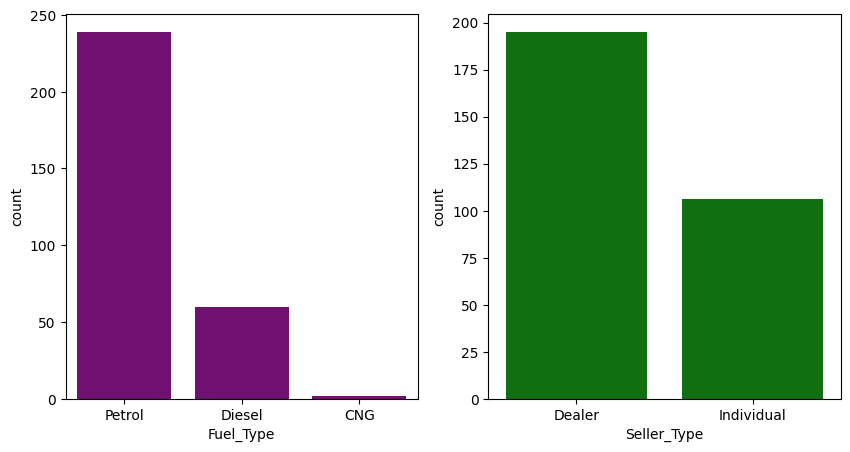

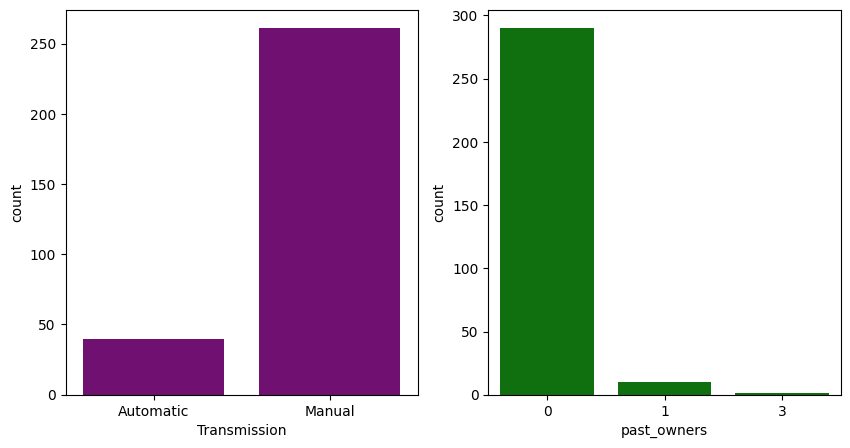

In [ ]:
cat_col= ['Fuel_Type','Seller_Type','Transmission','past_owners']
i=0
while i<3: # The loop should iterate three times, not four
  fig_= plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.countplot(x=cat_col[i],data=data,color='purple')
  i+=1
  plt.subplot(1,2,2)
  sns.countplot(x=cat_col[i],data=data,color='green')
  i+=1
  if i < 4: # Check if i is still within the valid range before accessing cat_col
    data[cat_col[i]]= data[cat_col[i]].astype('category')
  plt.show()

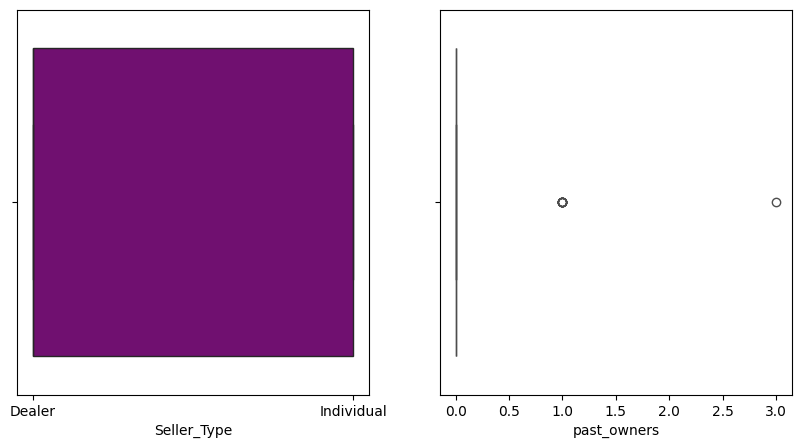

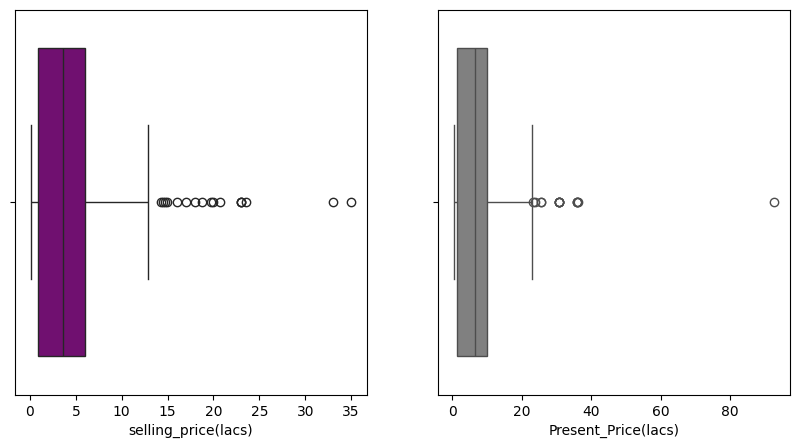

In [ ]:
num_col= ['Seller_Type','past_owners','selling_price(lacs)','Present_Price(lacs)']
i=0
while i<4:
  fig_= plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.boxplot(x=num_col[i],data=data,color='purple')
  i=i+1
  if i < 4: # Check if i is still within the valid range before accessing num_col
    plt.subplot(1,2,2)
    sns.boxplot(x=num_col[i],data=data,color='grey')
    i=i+1 # Only increment i a second time if a second plot is created

In [ ]:
data.head()

,Car_Name,Year,selling_price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,past_owners
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Check if 'Car_Name' column exists before dropping
if 'Car_Name' in data.columns:
    data.drop(labels='Car_Name',axis=1,inplace= True)
    print("Column 'Car_Name' dropped successfully.")
else:
    print("Column 'Car_Name' not found in the DataFrame.")

Column 'Car_Name' not found in the DataFrame.


In [ ]:
data= pd.get_dummies(data=data,drop_first=True)

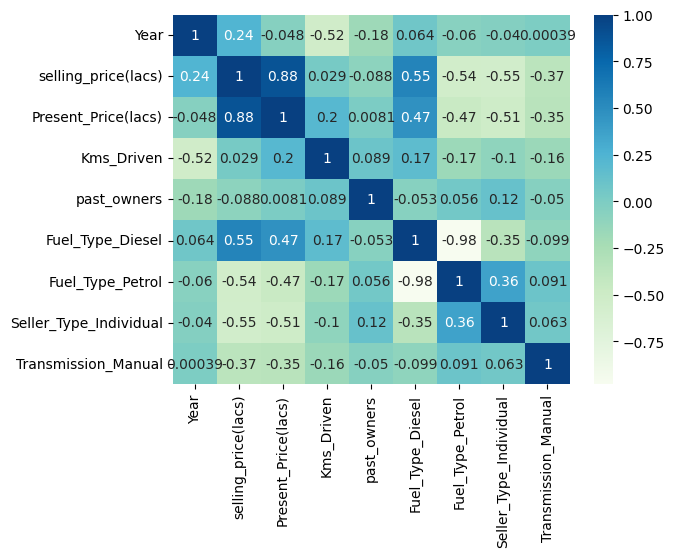

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='GnBu')
plt.show()

In [ ]:
data.corr()['selling_price(lacs)']

Year                      0.236141
selling_price(lacs)       1.000000
Present_Price(lacs)       0.878983
Kms_Driven                0.029187
past_owners              -0.088344
Fuel_Type_Diesel          0.552339
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Transmission_Manual      -0.367128
Name: selling_price(lacs), dtype: float64

In [ ]:
#train_test_split
#separating target variables and its features
x= data.drop('selling_price(lacs)',axis=1)
y= data['selling_price(lacs)']

In [ ]:
data.head()

,Year,selling_price(lacs),Present_Price(lacs),Kms_Driven,past_owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: selling_price(lacs), dtype: float64

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)
print("x train:" ,x_train.shape)
print("x test:",x_test.shape)
print("y train:",y_train.shape)
print("y test:",y_test.shape)

x train: (240, 8)
x test: (61, 8)
y train: (240,)
y test: (61,)


In [ ]:
#create linear regression model
model= LinearRegression()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)

In [ ]:
# Display the first few elements of the NumPy array
print(y_pred)

[10.57889241  0.71754255  4.23613904  5.17855444  9.75533583  4.20615652
  2.6748089   7.63221623  0.17032381  5.13283747  6.15727726  6.44545506
  2.11900126  7.6644102   1.91710055  1.71680788  2.02672159  1.85294787
  9.56717323  4.23076317  1.48724915  9.36189904  1.46103587  9.54572517
  0.82954545  8.32266051  1.53698563 -3.16293717  4.2127377   2.10385587
  3.42279444  3.71284702  5.54538889  7.6834828  -1.89757368  7.06591847
  8.46027656  5.77704136  6.10531922  6.52919752 16.08564344  2.07410694
  1.05462465 -0.44710144  7.06940454  6.73548589  0.98609923  7.08961114
 14.16420523  3.00434598  8.2871215  -0.87862345  8.8814273   1.15099681
  2.11848057 -0.82641923  0.69287067  9.88583992 -0.45444272 -2.41051663
 10.28627971]


In [ ]:
#print the model coefficient and intercept
print("Model Coefficient:",model.coef_)
print("Model Intercept:",model.intercept_)

Model Coefficient: [ 4.06411225e-01  4.28802981e-01 -5.92316903e-06 -8.49009727e-01
  2.86056285e+00  7.03103550e-01 -1.07477347e+00 -1.50897975e+00]
Model Intercept: -816.131973437433


In [ ]:
#evalute the model with mean squared error
mse= metrics.mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 2.750689262142477


In [ ]:
error= y_test-y_pred
print("Error:",error)

Error: 99    -0.928892
161   -0.267543
89     0.513861
30    -2.078554
232    1.694664
         ...   
172   -0.292871
94    -5.885840
160    0.904443
199    2.530517
91     0.963720
Name: selling_price(lacs), Length: 61, dtype: float64


<Axes: ylabel='selling_price(lacs)'>

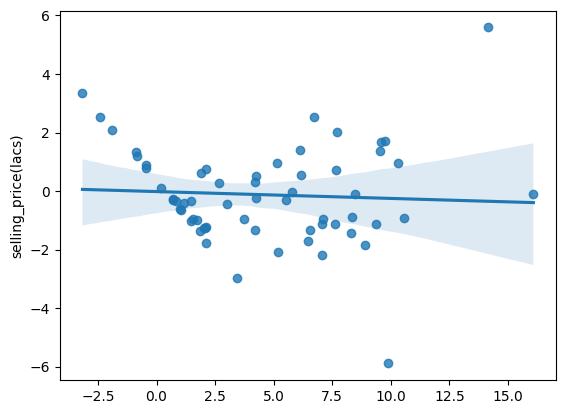

In [80]:
sns.regplot(x= y_pred,y= error, data= data)

In [88]:
#evalution metrics
accurracy= metrics.r2_score(y_test,y_pred)
print("Accuracy:",accurracy)



Accuracy: 0.8502332355854112
